# Práctica: Regresión lineal
- **Objetivo de la actividad**: El alumno realizará un análisis predictivo sobre los casos de COVID en México
- Utilizar  el modelo de regresión lineal, para determinar la tendencia o  predicción de  los casos confirmados de COVID durante el  año 2023., es decir, la predicción, estimación o tendencia,  se deberá realizar por el total de casos confirmados por día.
- Presentar el gráfico de regresión lineal
- Presentar los datos reales y de predicción (dataset )

## Parte 1 : importacion de bibliotecas y datos
---

### Importacion de las bibliotecas

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime

### Importacion de datos 

In [212]:
path_data_covid = "COVID19MEXICO.csv"
data_covid = pd.read_csv(path_data_covid)
data_covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-07-04,af960d,2,12,9,2,9,9,12,1,...,2,1,2,2,97,7,99,México,97,97
1,2023-07-04,d71ea5,2,12,7,1,7,7,111,1,...,2,2,97,2,97,6,99,México,97,97
2,2023-07-04,490e8d,1,12,19,2,19,19,43,1,...,2,2,97,2,97,6,99,México,97,97
3,2023-07-04,c9a5ed,2,12,9,2,9,9,9,1,...,2,2,97,1,2,7,99,México,97,97
4,2023-07-04,cbecc9,2,6,5,1,5,5,28,1,...,2,2,97,1,2,7,99,México,97,97


### Lectura del diccionario de datos

In [213]:
# Ruta del archivo de Excel
path_dictionary_excel = '201128 Catalogos_edit.xlsx'

# Leer el archivo de Excel
dictionary_excel = pd.ExcelFile(path_dictionary_excel)

# Obtener las hojas del archivo de Excel
sheets = dictionary_excel.sheet_names

# Iterar sobre las hojas y leer cada una en un DataFrame separado
data_dictionary = {}

for sheet in sheets:
    df = pd.read_excel(dictionary_excel, sheet_name=sheet)
    data_dictionary[sheet] = df

# Acceder a los data_dictionary de cada hoja
for sheet, df in data_dictionary.items():
    print(f"Hoja: '{sheet}'")

Hoja: 'Catálogo ORIGEN'
Hoja: 'Catálogo SECTOR'
Hoja: 'Catálogo SEXO'
Hoja: 'Catálogo TIPO_PACIENTE'
Hoja: 'Catálogo SI_NO'
Hoja: 'Catálogo NACIONALIDAD'
Hoja: 'Catálogo RESULTADO_LAB'
Hoja: 'Catálogo RESULTADO_ANTIGENO'
Hoja: 'Catálogo CLASIFICACION_FINAL'
Hoja: 'Catálogo de ENTIDADES'
Hoja: 'Catálogo MUNICIPIOS'


## Parte 2 : Graficar los datos
---

In [214]:
# Guardamos en una variable la hoja del diccionario de datos "Catálogo RESULTADO_LAB"
sheet_result_laboratories = data_dictionary["Catálogo RESULTADO_LAB"]

sheet_result_laboratories

,CLAVE,DESCRIPCIÓN
0,1,POSITIVO A SARS-COV-2
1,2,NO POSITIVO A SARS-COV-2
2,3,RESULTADO PENDIENTE
3,4,RESULTADO NO ADECUADO
4,97,NO APLICA (CASO SIN MUESTRA)


In [215]:
# Conbinamos los DataFrames, para obtener el resultado del laboratorio
data_covid_with_laboratories = pd.merge(data_covid, sheet_result_laboratories, left_on='RESULTADO_LAB', right_on='CLAVE', how="left")

data_covid_with_laboratories

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CLAVE,DESCRIPCIÓN
0,2023-07-04,af960d,2,12,9,2,9,9,12,1,...,2,2,97,7,99,México,97,97,2,NO POSITIVO A SARS-COV-2
1,2023-07-04,d71ea5,2,12,7,1,7,7,111,1,...,97,2,97,6,99,México,97,97,97,NO APLICA (CASO SIN MUESTRA)
2,2023-07-04,490e8d,1,12,19,2,19,19,43,1,...,97,2,97,6,99,México,97,97,97,NO APLICA (CASO SIN MUESTRA)
3,2023-07-04,c9a5ed,2,12,9,2,9,9,9,1,...,97,1,2,7,99,México,97,97,97,NO APLICA (CASO SIN MUESTRA)
4,2023-07-04,cbecc9,2,6,5,1,5,5,28,1,...,97,1,2,7,99,México,97,97,97,NO APLICA (CASO SIN MUESTRA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965456,2023-07-04,m181e49,2,12,15,1,15,15,999,1,...,4,2,97,6,99,México,97,97,4,RESULTADO NO ADECUADO
965457,2023-07-04,m07b940,2,12,15,1,15,15,999,1,...,4,2,97,6,99,México,97,97,4,RESULTADO NO ADECUADO
965458,2023-07-04,m12eff4,2,3,15,2,15,15,999,1,...,97,1,2,7,99,México,97,97,97,NO APLICA (CASO SIN MUESTRA)
965459,2023-07-04,m184665,2,12,15,2,15,15,999,1,...,4,2,97,6,99,México,97,97,4,RESULTADO NO ADECUADO


In [216]:
# Filtrado de datos solo positivos a covid
data_covid_with_laboratories_positive = data_covid_with_laboratories[data_covid_with_laboratories["DESCRIPCIÓN"] == "POSITIVO A SARS-COV-2"]

data_covid_with_laboratories_positive

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CLAVE,DESCRIPCIÓN
50,2023-07-04,5f09de,2,9,24,2,24,24,28,1,...,1,2,97,3,99,México,97,97,1,POSITIVO A SARS-COV-2
83,2023-07-04,gz32841,2,12,9,2,9,9,10,1,...,1,2,97,3,99,México,97,97,1,POSITIVO A SARS-COV-2
123,2023-07-04,g37a3eb,2,4,9,1,20,9,5,2,...,1,1,1,3,99,México,97,2,1,POSITIVO A SARS-COV-2
152,2023-07-04,g340fe1,2,12,14,1,14,14,39,1,...,1,2,97,3,99,México,97,97,1,POSITIVO A SARS-COV-2
154,2023-07-04,g2b6da8,2,12,14,2,14,14,98,1,...,1,2,97,3,99,México,97,97,1,POSITIVO A SARS-COV-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964982,2023-07-04,m0ecb41,2,12,15,1,15,15,999,1,...,1,2,97,3,99,México,97,97,1,POSITIVO A SARS-COV-2
965026,2023-07-04,m0b0eda,2,12,15,1,15,15,999,1,...,1,2,97,3,99,México,97,97,1,POSITIVO A SARS-COV-2
965168,2023-07-04,m04788f,2,12,15,2,9,9,12,2,...,1,2,97,3,99,México,97,2,1,POSITIVO A SARS-COV-2
965322,2023-07-04,m135546,2,9,15,1,9,15,999,2,...,1,2,97,3,99,México,97,2,1,POSITIVO A SARS-COV-2


In [217]:
# Filtramos las columnas para solo tener FECHA_INGRESO y DESCRIPCIÓN
data_covid_filtered = data_covid_with_laboratories_positive[['FECHA_INGRESO', 'DESCRIPCIÓN']]

data_covid_filtered

,FECHA_INGRESO,DESCRIPCIÓN
50,2023-01-12,POSITIVO A SARS-COV-2
83,2023-01-16,POSITIVO A SARS-COV-2
123,2023-01-01,POSITIVO A SARS-COV-2
152,2023-01-02,POSITIVO A SARS-COV-2
154,2023-01-02,POSITIVO A SARS-COV-2
...,...,...
964982,2023-05-16,POSITIVO A SARS-COV-2
965026,2023-05-10,POSITIVO A SARS-COV-2
965168,2023-05-25,POSITIVO A SARS-COV-2
965322,2023-06-03,POSITIVO A SARS-COV-2


In [218]:
# Convertir 'FECHA_INGRESO' a formato de fecha
data_covid_filtered.loc[:, 'FECHA_INGRESO'] = pd.to_datetime(data_covid_filtered['FECHA_INGRESO'])


In [219]:
# Agrupar por día y contarlos
daily_cases = data_covid_filtered.groupby('FECHA_INGRESO').count()

daily_cases = daily_cases.reset_index()

daily_cases

,FECHA_INGRESO,DESCRIPCIÓN
0,2023-01-01,67
1,2023-01-02,346
2,2023-01-03,467
3,2023-01-04,561
4,2023-01-05,571
...,...,...
179,2023-06-29,25
180,2023-06-30,17
181,2023-07-01,2
182,2023-07-02,6


In [220]:
daily_cases

,FECHA_INGRESO,DESCRIPCIÓN
0,2023-01-01,67
1,2023-01-02,346
2,2023-01-03,467
3,2023-01-04,561
4,2023-01-05,571
...,...,...
179,2023-06-29,25
180,2023-06-30,17
181,2023-07-01,2
182,2023-07-02,6


### Determinar la correlación

In [221]:
# Determinar la correlacion de pearson
daily_cases.corr(method="pearson")

,FECHA_INGRESO,DESCRIPCIÓN
FECHA_INGRESO,1.000000,-0.733386
DESCRIPCIÓN,-0.733386,1.000000


### Crear un gráfico

In [222]:
y = daily_cases["DESCRIPCIÓN"] # dependiente
x = daily_cases["FECHA_INGRESO"] # independiente

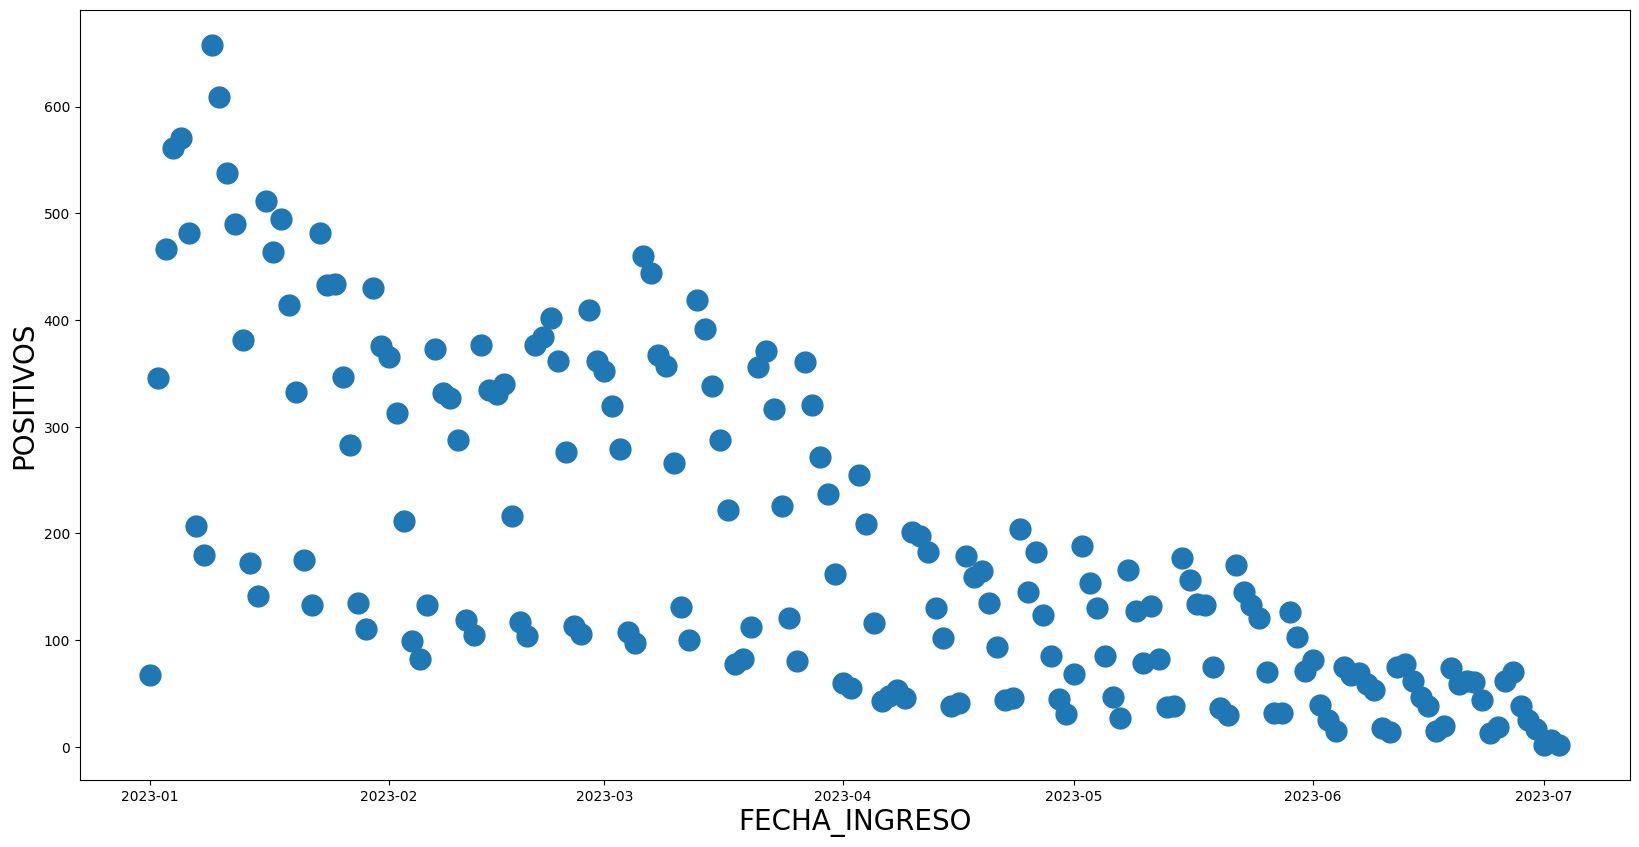

In [223]:
# Incrementar el tamaño del grafico
plt.figure(figsize=(20,10))

plt.plot(x, y, "o", markersize = 15)

# Agrega y aumenta el tamño de los textos en de los ejes x, y
plt.ylabel("POSITIVOS", fontsize = 20)
plt.xlabel("FECHA_INGRESO", fontsize = 20)

# Aumenta el tamaño de la letra de los valores x, y
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

# Muestra el grafico
plt.show()

## Parte 3: Realizar un regresión lineal simple
---

Calcular la pendiente `x` la intersección `y`, de la linea de regresión lineal

In [224]:

daily_cases['FECHA_NUM'] = daily_cases['FECHA_INGRESO'].map(pd.Timestamp.timestamp)
# daily_cases = daily_cases[['FECHA_NUM', "DESCRIPCIÓN"]]
daily_cases

,FECHA_INGRESO,DESCRIPCIÓN,FECHA_NUM
0,2023-01-01,67,1.672531e+09
1,2023-01-02,346,1.672618e+09
2,2023-01-03,467,1.672704e+09
3,2023-01-04,561,1.672790e+09
4,2023-01-05,571,1.672877e+09
...,...,...,...
179,2023-06-29,25,1.687997e+09
180,2023-06-30,17,1.688083e+09
181,2023-07-01,2,1.688170e+09
182,2023-07-02,6,1.688256e+09


In [225]:
daily_cases.corr(method="pearson")

y = daily_cases["DESCRIPCIÓN"] # dependiente
x = daily_cases["FECHA_NUM"] # independiente

In [226]:
m, b = np.polyfit(x,y,1)
print (f"La pendiente de la linea es {m}")
print (f"La y-interseccion es {b}")
print (f"La mejor linea de regresion lineal es: {m}x y {b}y")

La pendiente de la linea es -2.4400569939148427e-05
La y-interseccion es 41192.43631889267
La mejor linea de regresion lineal es: -2.4400569939148427e-05x y 41192.43631889267y


### Calcular el centroide
- Se calcula utilizando la función promedio

In [227]:
# coordenada y para el centroide
y_mean = y.mean()

# Coordenada x para el centroide
x_mean = x.mean()

print(f"El centroide es x={y_mean}, y={x_mean}")

El centroide es x=188.82065217391303, y=1680436800.0


### Paso 3: Superponer la linea de regresión y el punto del centroide en el gráfico

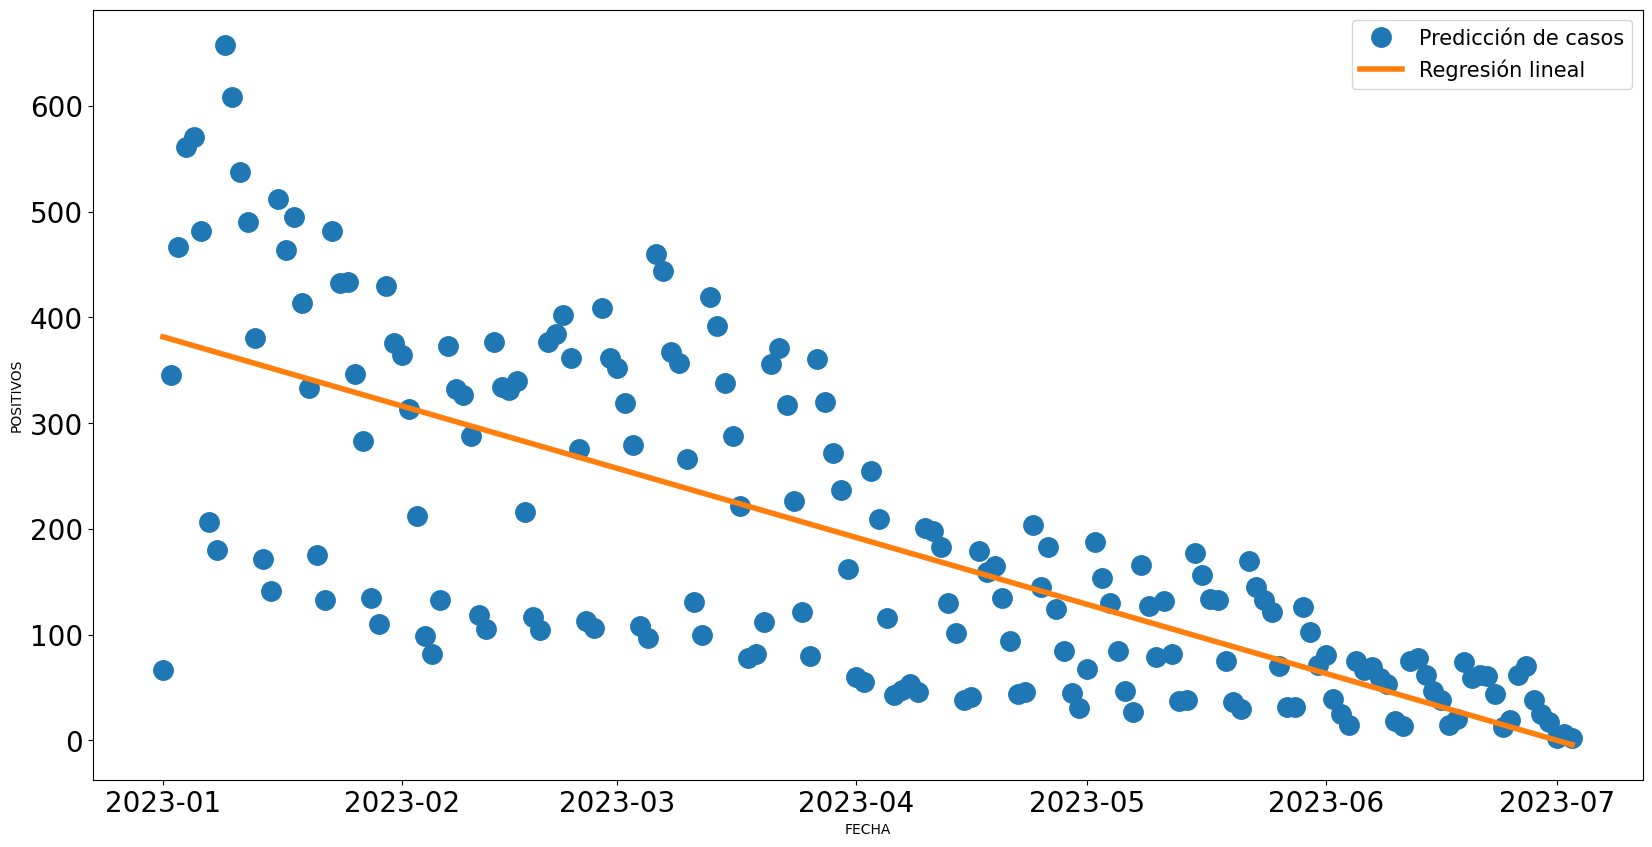

In [228]:
# Determinar tamñao del grafico
plt.figure(figsize=(20, 10))

# Dibujar el diagrama de dispersión del conjunto de datos
plt.plot(daily_cases["FECHA_INGRESO"], daily_cases["DESCRIPCIÓN"], "o", markersize=14, label="Predicción de casos")

# Punto del centroide en el gráfico
plt.plot(daily_cases["FECHA_INGRESO"], m * daily_cases["FECHA_NUM"] + b, "-", label="Regresión lineal", linewidth=4)

# Crear titulos del eje x, y
plt.ylabel("POSITIVOS")
plt.xlabel("FECHA")

# Aumenta el tamaño de la letra de los valores x, y
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

# Señalar el putno del centroide en la grafica
plt.annotate("Centroide", xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor="black", shrink=0.05))

# Crear leyenda
plt.legend(loc = "upper right", fontsize = 15)

# Mostrar el grafico
plt.show()

### Predicción

In [232]:
import datetime

def prediction(query):
    try:
        query_date = datetime.datetime.strptime(query, "%d-%m-%Y")
    except ValueError:
        print("Formato de fecha incorrecto. Utiliza el formato día-mes-año (ejemplo: 01-01-2023).")
        return
    
    query_num = pd.Timestamp(query_date).timestamp()
    predict = m * query_num + b
    return predict


In [240]:
# Se predice la fecha en forma dd-mm-yyyy
prediction("03-07-2023")

-4.080493537039729

In [241]:
pd.DataFrame({"Fecha": daily_cases["FECHA_INGRESO"], "Positivos": y, "y-predecida": m * daily_cases["FECHA_NUM"] + b})

,Fecha,Positivos,y-predecida
0,2023-01-01,67,381.721798
1,2023-01-02,346,379.613589
2,2023-01-03,467,377.505379
3,2023-01-04,561,375.397170
4,2023-01-05,571,373.288961
...,...,...,...
179,2023-06-29,25,4.352343
180,2023-06-30,17,2.244134
181,2023-07-01,2,0.135925
182,2023-07-02,6,-1.972284
